In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 음식물 쓰레기 양이 많은 이유?
# 1인가구의 배달 음식 양이 많아서가 아닐까.
# 서울시 음식물 처리량(자치구별 인구수에 대해 비율 나타내기), 배달 앱 이용 데이터, 1인가구 비율 

In [23]:
food_garbage = './서울시_음식물쓰레기_통계.csv'
fg = pd.read_csv(food_garbage, header=4, index_col=1)
fg.head()

,자치구별(1),소계,소계.1,소계.2,사료화,퇴비화,하수병합,기타,소계.3
자치구별(2),,,,,,,,,
소계,서울시,2539.7,-,2539.7,1207.4,1105.9,-,226.4,-
종로구,서울시,76.1,-,76.1,65.4,10.3,-,0.4,-
중구,서울시,80.8,-,80.8,41.4,37.0,-,1.7,-
용산구,서울시,63.7,-,63.7,4.7,50.3,-,8.7,-
성동구,서울시,77.9,-,77.9,38.7,38.6,-,0.9,-


In [184]:
seoul_col = fg[['소계']]
seoul_all = seoul_col.iloc[1:]


In [185]:
seoul_all.shape
seoul_all.rename(columns={"소계":"음쓰_배출량"}, inplace=True)
seoul_all

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2124\792399108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_all.rename(columns={"소계":"음쓰_배출량"}, inplace=True)


,음쓰_배출량
자치구별(2),
종로구,76.1
중구,80.8
용산구,63.7
성동구,77.9
광진구,86.8
동대문구,90.8
중랑구,86.7
성북구,86.9
강북구,68.7


In [188]:
plt.figure(figsize=(20, 20))
seoul_all.plot(kind='bar',x=seoul_all.index, y='소계')
plt.title('서울 자치구별 음식물 쓰레기 배출량')
plt.legend()
plt.xticks(rotation=70)
plt.show()

KeyError: "None of [Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',\n       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',\n       '관악구', '서초구', '강남구', '송파구', '강동구'],\n      dtype='object', name='자치구별(2)')] are in the [columns]"

<Figure size 2000x2000 with 0 Axes>

In [55]:
# 서울시 자치구별 인구수
people_su = pd.read_html("https://mestarry.com/%EC%84%9C%EC%9A%B8%EC%8B%9C-%EC%9E%90%EC%B9%98%EA%B5%AC%EB%B3%84-%EC%9D%B8%EA%B5%AC%EC%88%98-%EC%88%9C%EC%9C%84%EC%99%80-%EB%B9%84%EC%9C%A8-%EC%9D%B8%EA%B5%AC-%EB%B3%80%ED%99%94-%EC%B6%94%EC%9D%B4/", index_col=1)
seoul_people = pd.DataFrame(people_su[0]['총인구수 (명)'].iloc[1:])
seoul_people
type(seoul_people)


pandas.core.frame.DataFrame

In [192]:
#자치구별 음식물 쓰레기, 자치구별 인구수 합치기
garbage_people_in_seoul = pd.concat([seoul_all, seoul_people], axis=1) 
garbage_people_in_seoul.rename(columns={"음쓰_배출량":"음쓰_배출량", "총인구수 (명)":"인구수"}, inplace=True)
garbage_people_in_seoul

,음쓰_배출량,인구수
종로구,76.1,140397
중구,80.8,121441
용산구,63.7,217288
성동구,77.9,279374
광진구,86.8,336169
동대문구,90.8,338115
중랑구,86.7,384272
성북구,86.9,429142
강북구,68.7,291384
도봉구,72.8,308986


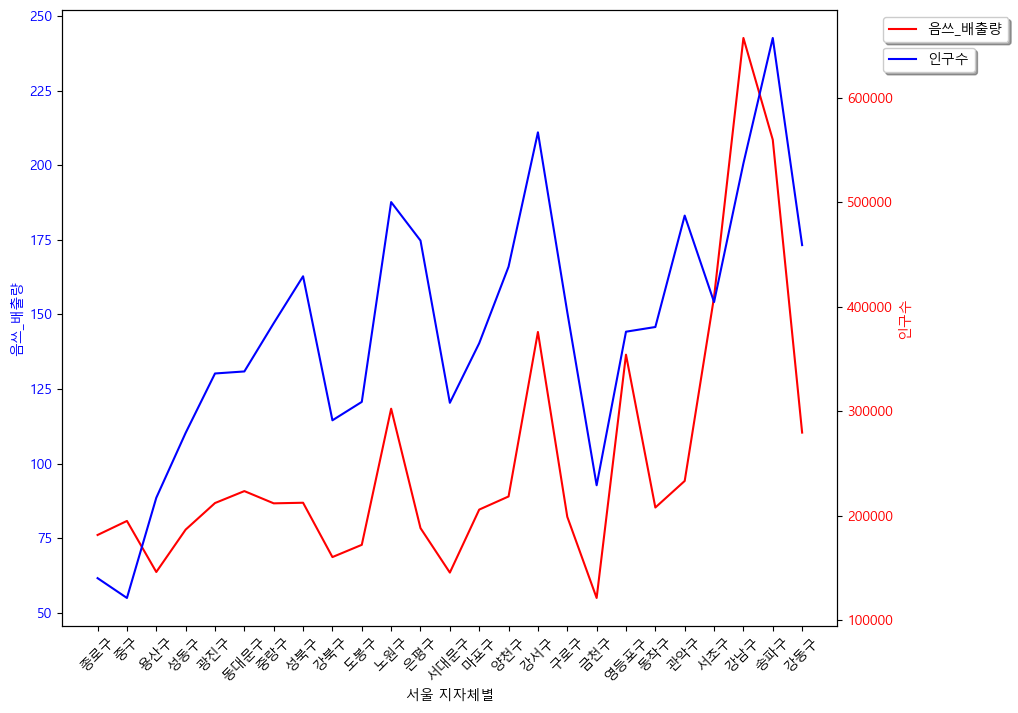

In [197]:
plt.figure(figsize=(10,8))

# Create the first axis
ax1 = plt.gca()
ax1.plot(garbage_people_in_seoul.index, garbage_people_in_seoul['음쓰_배출량'], label='음쓰_배출량', color='r')
ax1.set_xlabel('서울 지자체별') 
ax1.set_ylabel('음쓰_배출량', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Rotate the x-axis labels for ax1
plt.xticks(rotation=45)

# Create the second axis as a twin of the first axis
ax2 = ax1.twinx()
ax2.plot(garbage_people_in_seoul.index, garbage_people_in_seoul['인구수'], label='인구수', color='b')
ax2.set_ylabel('인구수', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)
ax2.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', shadow=True)

plt.show()


In [132]:
#1인당 음식물 쓰레기 배출 비율
li = round(garbage_people_in_seoul["음식물발생량"]/garbage_people_in_seoul["인구수"]* 10000, 2) 
garbage1 = pd.DataFrame(li, columns=["1인음쓰_비율"]) 
garbage1

,1인음쓰_비율
종로구,5.42
중구,6.65
용산구,2.93
성동구,2.79
광진구,2.58
동대문구,2.69
중랑구,2.26
성북구,2.02
강북구,2.36
도봉구,2.36


In [107]:
# 서울시 1인 가구
file_path_1 = './1인가구.csv'
one_person = pd.read_csv(file_path_1, index_col=1)[['2022']]

#불필요한 인덱스 행 제거
one_person = one_person.drop(index=["자치구별(2)", "소계"])

#그룹화 한 것 중에 첫번째 값만 가져오기
one_person = one_person.groupby("자치구별(2)").first()
one_person = one_person.rename(columns={'2022': '1인가구'})
one_person.sort_values(by='1인가구')

,1인가구
자치구별(2),
강서구,100695
관악구,145433
중구,25247
종로구,28424
도봉구,39744
용산구,41437
양천구,45502
성동구,46548
서초구,46745


In [110]:
garbage_person_in_seoul = pd.concat([garbage_people_in_seoul, one_person], axis=1)
garbage_person_in_seoul

,음식물발생량,인구수,1인가구
종로구,76.1,140397,28424
중구,80.8,121441,25247
용산구,63.7,217288,41437
성동구,77.9,279374,46548
광진구,86.8,336169,69391
동대문구,90.8,338115,68169
중랑구,86.7,384272,64334
성북구,86.9,429142,67222
강북구,68.7,291384,51134
도봉구,72.8,308986,39744


In [138]:
garbage_person_in_seoul['인구수'] = pd.to_numeric(garbage_person_in_seoul['인구수'], errors='coerce')
garbage_person_in_seoul['1인가구'] = pd.to_numeric(garbage_person_in_seoul['1인가구'], errors='coerce')

li2 = round(garbage_person_in_seoul['인구수'] / garbage_person_in_seoul['1인가구'], 2)
person1 = pd.DataFrame(li2, columns=["1인가구_비율"])
person1


,1인가구_비율
종로구,4.94
중구,4.81
용산구,5.24
성동구,6.00
광진구,4.84
동대문구,4.96
중랑구,5.97
성북구,6.38
강북구,5.70
도봉구,7.77


In [147]:
person1_percent = pd.concat([person1, garbage1, seoul_all], axis=1)
person1_percent = person1_percent.sort_values(by="1인가구_비율", ascending=False)
person1_percent

,1인가구_비율,1인음쓰_비율,소계
양천구,9.63,2.03,89.0
서초구,8.65,3.85,155.8
송파구,7.97,3.17,208.5
노원구,7.94,2.37,118.4
도봉구,7.77,2.36,72.8
강동구,7.68,2.41,110.4
강남구,7.30,4.52,242.6
은평구,7.04,1.69,78.4
구로구,6.69,2.08,82.2
성북구,6.38,2.02,86.9


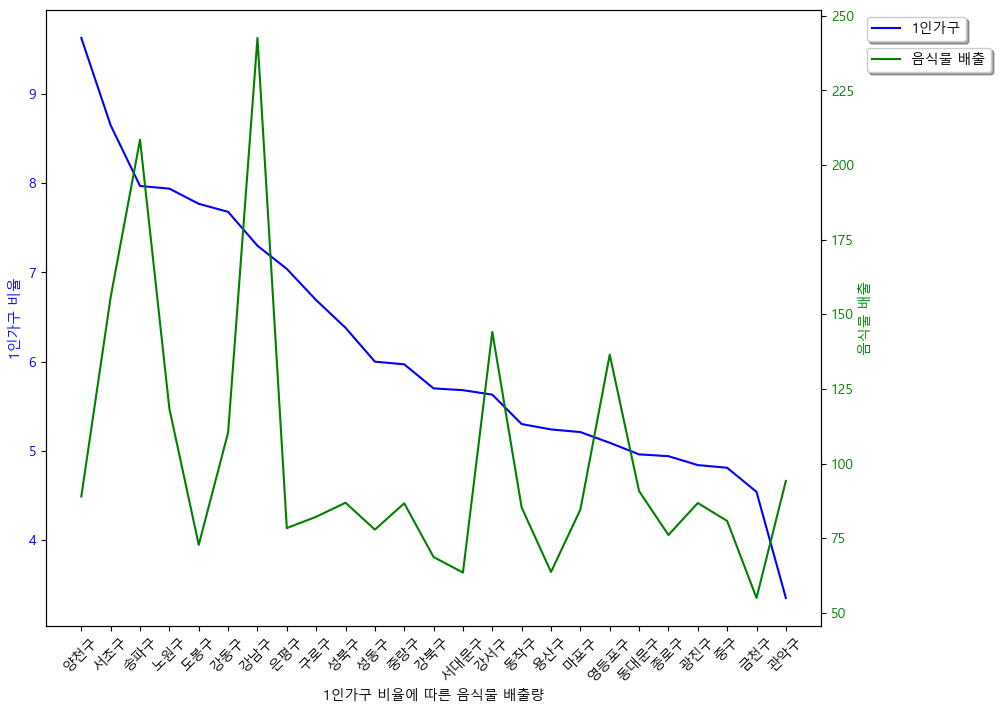

In [174]:
plt.figure(figsize=(10,8))

# Create the first axis
ax1 = plt.gca()
ax1.plot(person1_percent.index, person1_percent['1인가구_비율'], label='1인가구', color='b')
ax1.set_xlabel('1인가구 비율에 따른 음식물 배출량') 
ax1.set_ylabel('1인가구 비율', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Rotate the x-axis labels for ax1
plt.xticks(rotation=45)

# Create the second axis as a twin of the first axis
ax2 = ax1.twinx()
ax2.plot(person1_percent.index, person1_percent['소계'], label='음식물 배출', color='g')
ax2.set_ylabel('음식물 배출', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)
ax2.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', shadow=True)

plt.show()
